In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio

In [4]:
kernel = np.ones((3, 3), dtype=np.uint8)

# Visualize Thebe Compare

In [3]:
seis = np.load('./Fault_data/public_data/precessed/test/seis/seistest.npy', mmap_mode='r')
gt = np.load('./Fault_data/public_data/precessed/test/fault/faulttest.npy', mmap_mode='r')
# pred_3d = np.load(os.path.join('./MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_simmim500e_p16_public_256_flip_rotate_aug_4x4_rerun', 'thebe_pred/seistest_score.npy'), mmap_mode='r')
pred_3d = np.load('mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_fault_public_slice-512x512/predict/predict.npy', mmap_mode='r')
pred_2d = np.load('mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_mix_data_v2_force_3_chan-512x512_per_image_normal_simmim_1000e_new/thebe_pred/score.npy', mmap_mode='r')
pred_sam = np.load('SAM-Adapter/thebe_pred_v2/score.npy', mmap_mode='r')

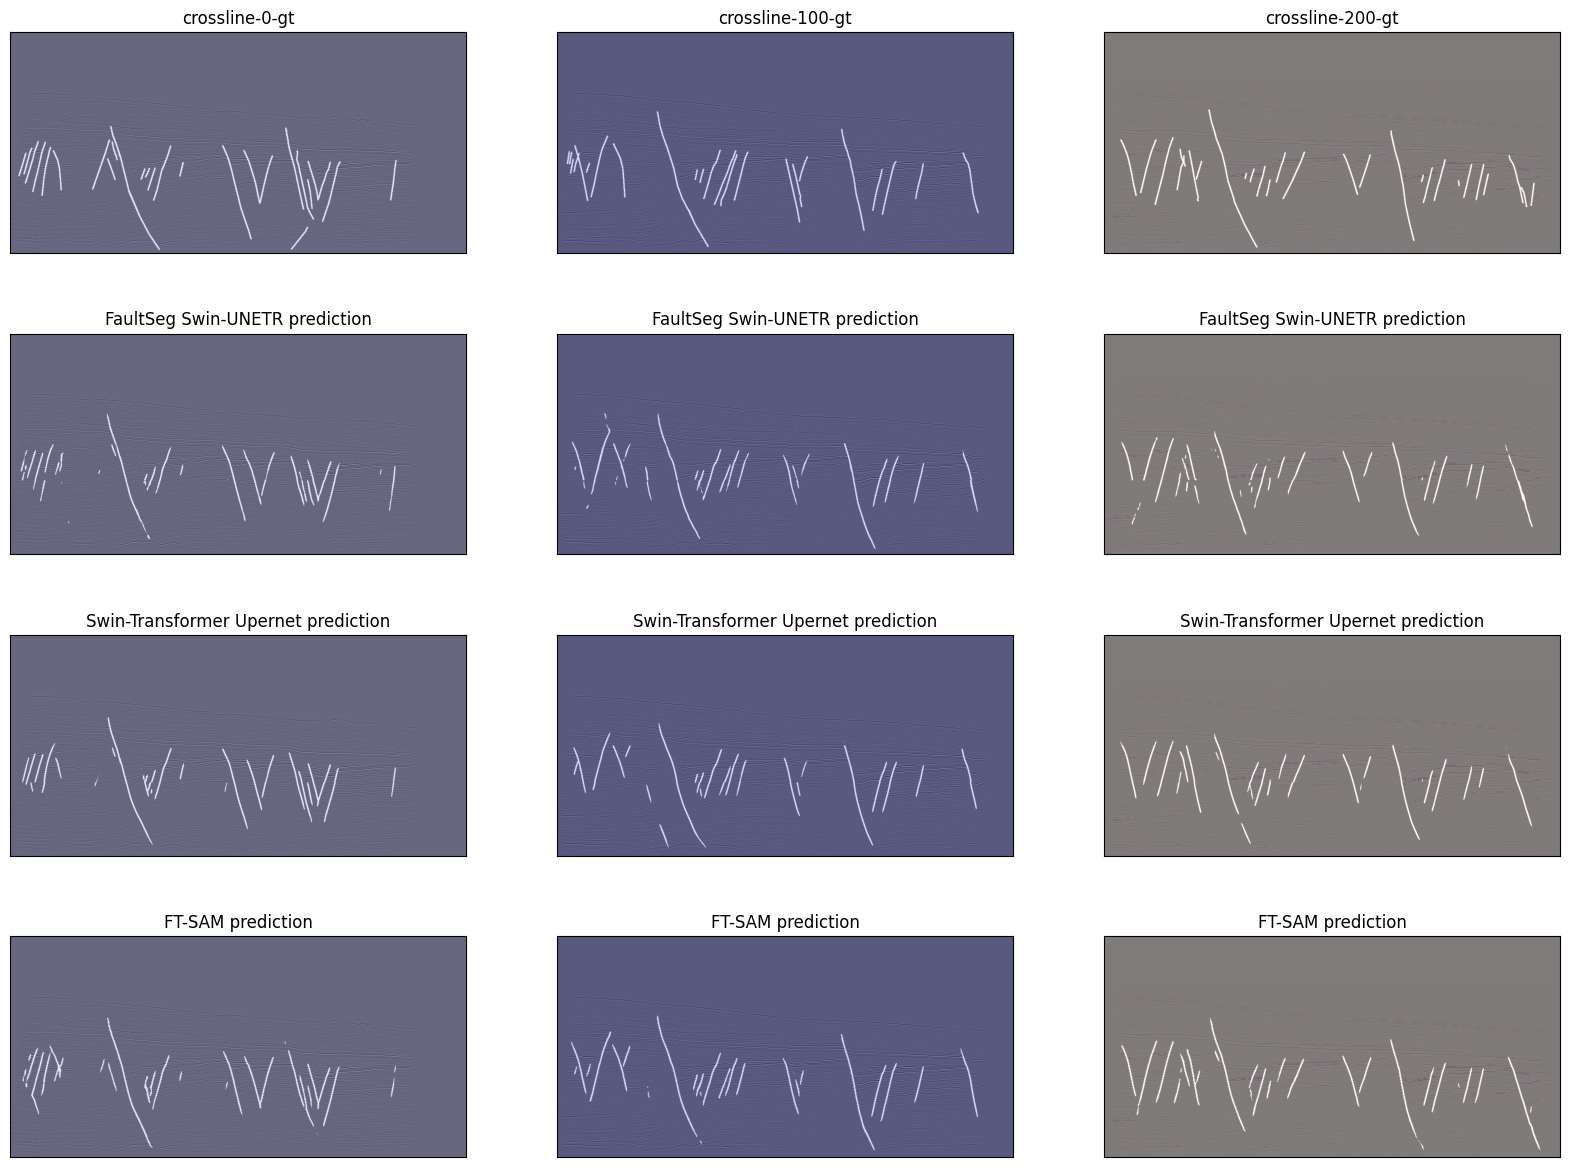

In [6]:
th = 0.5
idxs = [0, 100, 200]
plt.rcParams["figure.figsize"] = (20, 15)
fig, ax=plt.subplots(4,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[0, col].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'crossline-{idx}-gt')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    ax[1, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[1, col].imshow((pred_3d[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
    ax[1, col].axes.set_title('FaultSeg Swin-UNETR prediction')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    ax[2, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[2, col].imshow((pred_2d[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
    ax[2, col].axes.set_title('Swin-Transformer Upernet prediction')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
    ax[3, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[3, col].imshow((pred_sam[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
    ax[3, col].axes.set_title('FT-SAM prediction')
    ax[3, col].axes.xaxis.set_visible(False)
    ax[3, col].axes.yaxis.set_visible(False)
plt.show()

# Visualize 3D Project Data

In [6]:
seis = segyio.tools.cube('./Fault_data/real_labeled_data/origin_data/seis/mig_fill.sgy')
gt = segyio.tools.cube('./Fault_data/real_labeled_data/origin_data/fault/label_fill.sgy')
pred = np.load(os.path.join(pred_root_path, 'real_labeled_pred/score.npy'), mmap_mode='r')

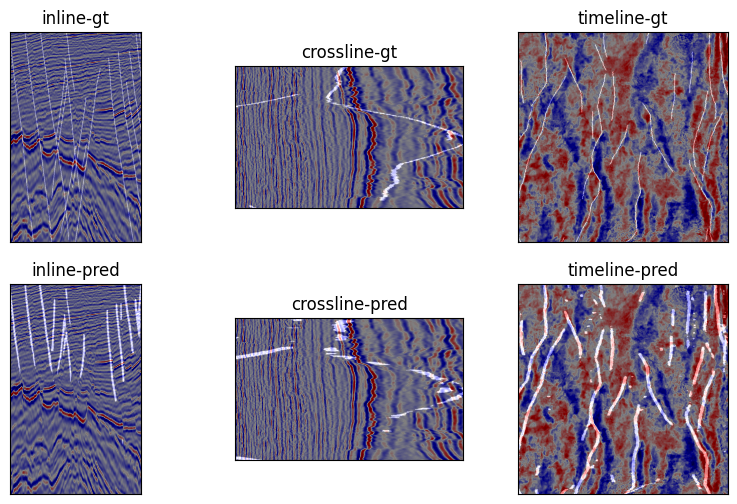

In [10]:
th = 0.46
idx = 100
plt.rcParams["figure.figsize"] = (10, 6)
fig, ax=plt.subplots(2,3)
ax[0, 0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[0, 0].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
ax[0, 0].axes.set_title('inline-gt')
ax[0, 0].axes.xaxis.set_visible(False)
ax[0, 0].axes.yaxis.set_visible(False)
ax[1, 0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[1, 0].imshow((pred[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
ax[1, 0].axes.set_title('inline-pred')
ax[1, 0].axes.xaxis.set_visible(False)
ax[1, 0].axes.yaxis.set_visible(False)

ax[0, 1].imshow(seis[:, idx, :], cmap='seismic')
ax[0, 1].imshow(gt[:, idx, :], cmap='gray', alpha=0.5)
ax[0, 1].axes.set_title('crossline-gt')
ax[0, 1].axes.xaxis.set_visible(False)
ax[0, 1].axes.yaxis.set_visible(False)
ax[1, 1].imshow(seis[:, idx, :], cmap='seismic')
ax[1, 1].imshow((pred[:, idx, :] > th).astype(np.uint8), cmap='gray', alpha=0.5)
ax[1, 1].axes.set_title('crossline-pred')
ax[1, 1].axes.xaxis.set_visible(False)
ax[1, 1].axes.yaxis.set_visible(False)

ax[0, 2].imshow(seis[:, :, idx], cmap='seismic')
ax[0, 2].imshow(gt[:, :, idx], cmap='gray', alpha=0.5)
ax[0, 2].axes.set_title('timeline-gt')
ax[0, 2].axes.xaxis.set_visible(False)
ax[0, 2].axes.yaxis.set_visible(False)
ax[1, 2].imshow(seis[:, :, idx], cmap='seismic')
ax[1, 2].imshow((pred[:, :, idx] > th).astype(np.uint8), cmap='gray', alpha=0.5)
ax[1, 2].axes.set_title('timeline-pred')
ax[1, 2].axes.xaxis.set_visible(False)
ax[1, 2].axes.yaxis.set_visible(False)

plt.show()

# Visualize Project Data V1

## Labeled

### qyb

In [11]:
seis = segyio.tools.cube('./Fault_data/project_data_v1/labeled/qyb/seis/20230412_QY-PSTM-STK-CG-TO-DIYAN.sgy')
gt = segyio.tools.cube('./Fault_data/project_data_v1/labeled/qyb/faults/expression_result.sgy')
pred = np.load(os.path.join(pred_root_path, 'project_data_v1_pred/labeled/qyb/score.npy'), mmap_mode='r')

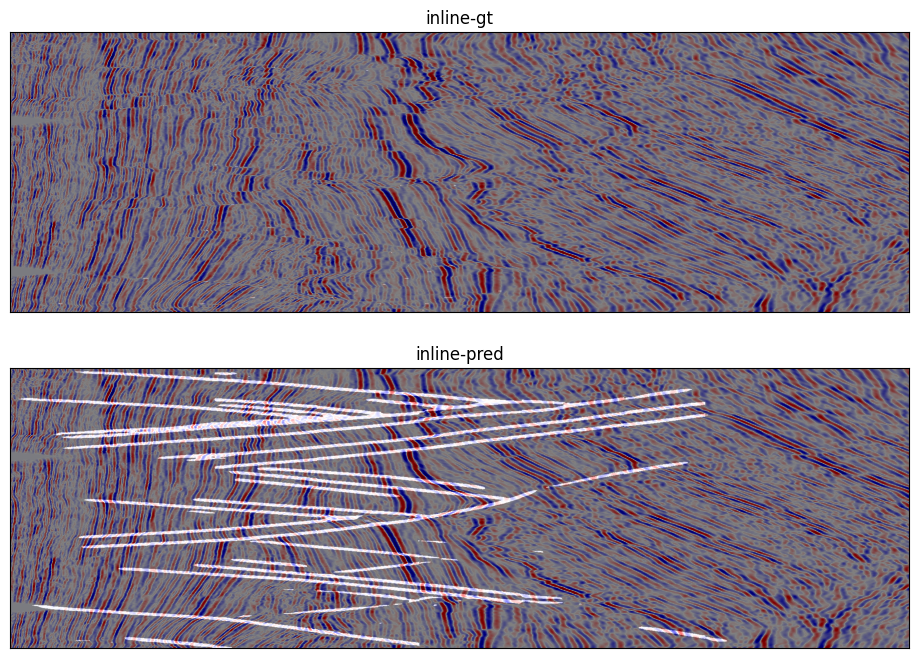

In [21]:
th = 0.46
idx = 34
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax=plt.subplots(2,1)
ax[0].imshow(seis[idx, :, :], cmap='seismic')
ax[0].imshow(gt[idx, :, :], cmap='gray', alpha=0.5)
ax[0].axes.set_title('inline-gt')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].imshow(seis[idx, :, :], cmap='seismic')
ax[1].imshow((pred[idx, :, :] > th).astype(np.uint8), cmap='gray', alpha=0.5)
ax[1].axes.set_title('inline-pred')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
plt.show()

### gjb

In [22]:
seis = segyio.tools.cube('./Fault_data/project_data_v1/labeled/Ordos/gjb/seis/L500_1500_T500_2000_aa_pstm_0922_cg.sgy')[:, :, 150:501]
gt = segyio.tools.cube('./Fault_data/project_data_v1/labeled/Ordos/gjb/faults/expression_result.sgy')
pred = np.load(os.path.join(pred_root_path, 'project_data_v1_pred/labeled/Ordos/gjb/score.npy'), mmap_mode='r')[:, :, 150:501]

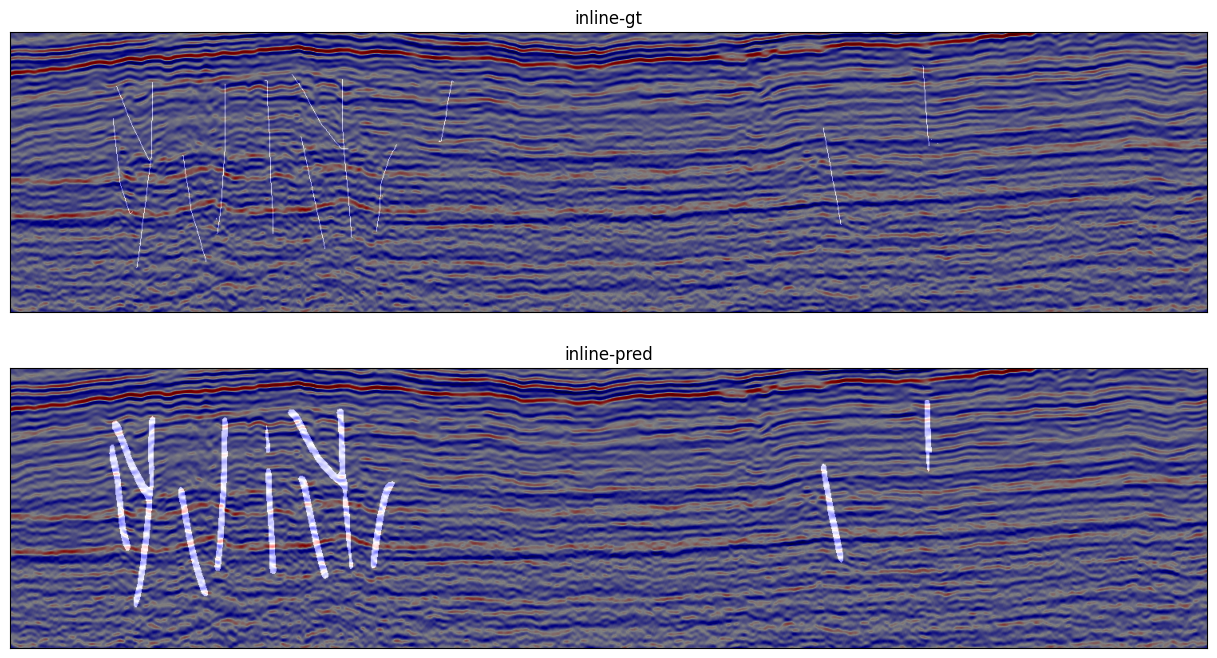

In [26]:
th = 0.46
idx = 16
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax=plt.subplots(2,1)
ax[0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[0].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
ax[0].axes.set_title('inline-gt')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].imshow(seis[idx, :, :].T, cmap='seismic')
ax[1].imshow((pred[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
ax[1].axes.set_title('inline-pred')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
plt.show()

### pl

In [27]:
seis = segyio.tools.cube('./Fault_data/project_data_v1/labeled/Ordos/pl/seis/20230419_PLB-YW-pstm-post-yanshou-Q_biaoqian.sgy')
gt = segyio.tools.cube('./Fault_data/project_data_v1/labeled/Ordos/pl/faults/pstm_pre22.sgy')
pred = np.load(os.path.join(pred_root_path, 'project_data_v1_pred/labeled/Ordos/pl/score.npy'), mmap_mode='r')

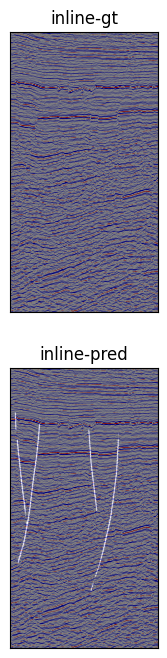

In [30]:
th = 0.46
idx = 12
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax=plt.subplots(2,1)
ax[0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[0].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
ax[0].axes.set_title('inline-gt')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].imshow(seis[idx, :, :].T, cmap='seismic')
ax[1].imshow((pred[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
ax[1].axes.set_title('inline-pred')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
plt.show()

# Visualize Project Data V2

## GYX

In [39]:
seis = segyio.tools.cube('./Fault_data/project_data_v2/GYX/seis/GYX3D2018-PSDM-VTI-CG1203-400Km2-DP-50.sgy')
gt = segyio.tools.cube('./Fault_data/project_data_v2/GYX/faults/faults.sgy')
pred = np.load(os.path.join(pred_root_path, 'project_data_v2_pred/GYX/score.npy'), mmap_mode='r')

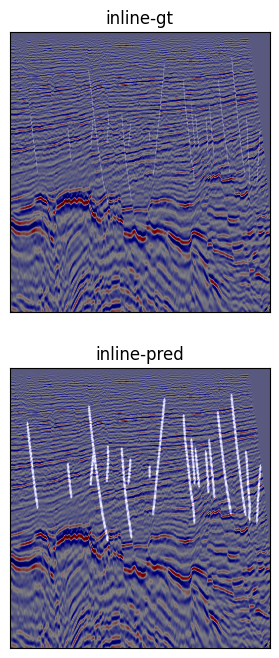

In [40]:
th = 0.46
idx = 7
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax=plt.subplots(2,1)
ax[0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[0].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
ax[0].axes.set_title('inline-gt')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].imshow(seis[idx, :, :].T, cmap='seismic')
ax[1].imshow((pred[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
ax[1].axes.set_title('inline-pred')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
plt.show()

## LH3D

In [41]:
seis = segyio.tools.cube('./Fault_data/project_data_v2/LH3D/seis/TJ-2022-6-15-pstm-cg.sgy')
gt = segyio.tools.cube('./Fault_data/project_data_v2/LH3D/faults/faults.sgy')
pred = np.load(os.path.join(pred_root_path, 'project_data_v2_pred/LH3D/score.npy'), mmap_mode='r')

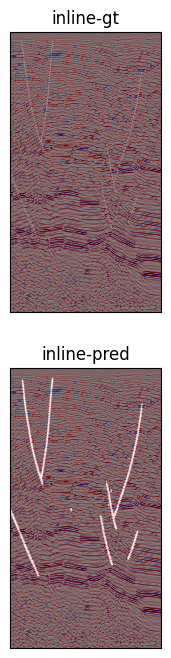

In [42]:
th = 0.46
idx = 4
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax=plt.subplots(2,1)
ax[0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[0].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
ax[0].axes.set_title('inline-gt')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].imshow(seis[idx, :, :].T, cmap='seismic')
ax[1].imshow((pred[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
ax[1].axes.set_title('inline-pred')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
plt.show()

## ZG3D

In [43]:
seis = segyio.tools.cube('./Fault_data/project_data_v2/ZG3D/seis/yanfa__ZG3d_PSTM_CG_0715-small.sgy')
gt = segyio.tools.cube('./Fault_data/project_data_v2/ZG3D/faults/faults.sgy')
pred = np.load(os.path.join(pred_root_path, 'project_data_v2_pred/ZG3D/score.npy'), mmap_mode='r')

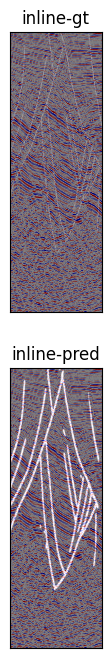

In [44]:
th = 0.46
idx = 4
plt.rcParams["figure.figsize"] = (20, 8)
fig, ax=plt.subplots(2,1)
ax[0].imshow(seis[idx, :, :].T, cmap='seismic')
ax[0].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
ax[0].axes.set_title('inline-gt')
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].imshow(seis[idx, :, :].T, cmap='seismic')
ax[1].imshow((pred[idx, :, :] > th).astype(np.uint8).T, cmap='gray', alpha=0.5)
ax[1].axes.set_title('inline-pred')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
plt.show()

# dafeng1

In [2]:
seis = segyio.tools.cube("/home/zhangzr/FaultRecongnition/Fault_data/project_data_v3/dafeng1/seis.sgy")
pred = np.load("/home/zhangzr/FaultRecongnition/mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_mix_data_v3_force_3_chan-512x512_per_image_normal_simmim_2000e/dafeng1_pred/score.npy")

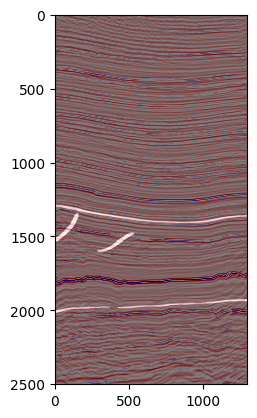

In [8]:
idx = 150
th = 0.2
plt.imshow(seis[idx, :, :].T, cmap='seismic')
plt.imshow((pred[idx, :, :] > th).T, cmap='gray', alpha=0.5)
plt.show()

# guai3east

In [2]:
seis = segyio.tools.cube("/home/zhangzr/FaultRecongnition/Fault_data/project_data_v3/guai3east/seis.sgy")
gt = segyio.tools.cube("/home/zhangzr/FaultRecongnition/Fault_data/project_data_v3/guai3east/guai3east_fault.sgy")
pred_inline = np.load("/home/zhangzr/FaultRecongnition/mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_mix_data_v3_force_3_chan-512x512_per_image_normal_simmim_2000e/guai3east_pred/score_inline.npy", mmap_mode="r")
pred_xline = np.load("/home/zhangzr/FaultRecongnition/mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_mix_data_v3_force_3_chan-512x512_per_image_normal_simmim_2000e/guai3east_pred/score_xline.npy", mmap_mode="r")

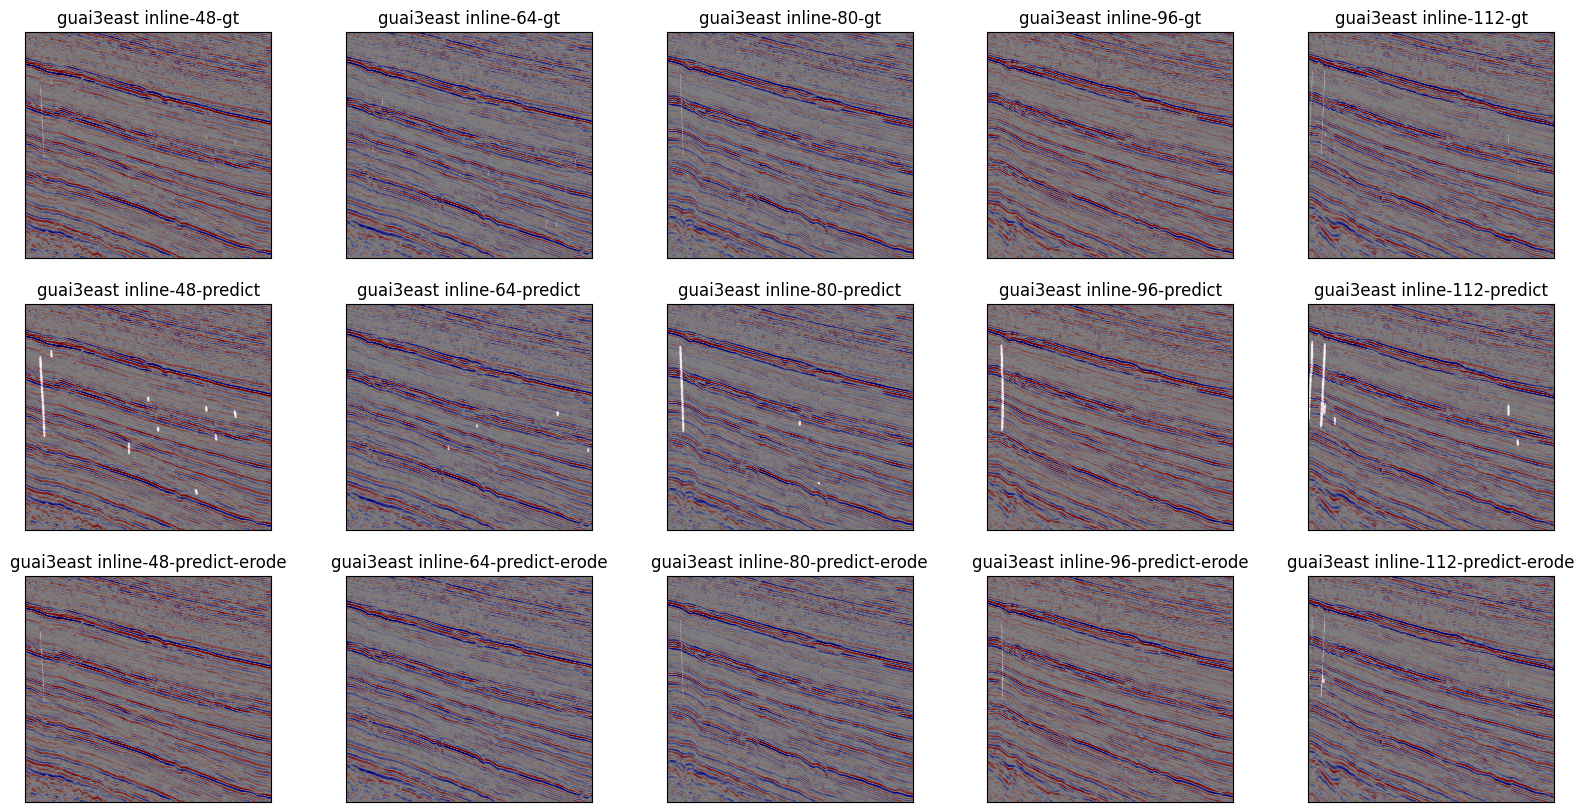

In [11]:
th = 0.5
idxs = [48, 64, 80, 96, 112]
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax=plt.subplots(3,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[0, col].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'guai3east inline-{idx}-gt')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    ax[1, col].imshow(seis[idx, :, :].T, cmap='seismic')
    pred_slice = (pred_inline[idx, :, :] > th).astype(np.uint8).T
    ax[1, col].imshow(pred_slice, cmap='gray', alpha=0.5)
    ax[1, col].axes.set_title(f'guai3east inline-{idx}-predict')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    ax[2, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[2, col].imshow(cv2.erode(pred_slice, kernel, iterations=3), cmap='gray', alpha=0.5)
    ax[2, col].axes.set_title(f'guai3east inline-{idx}-predict-erode')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
plt.show()

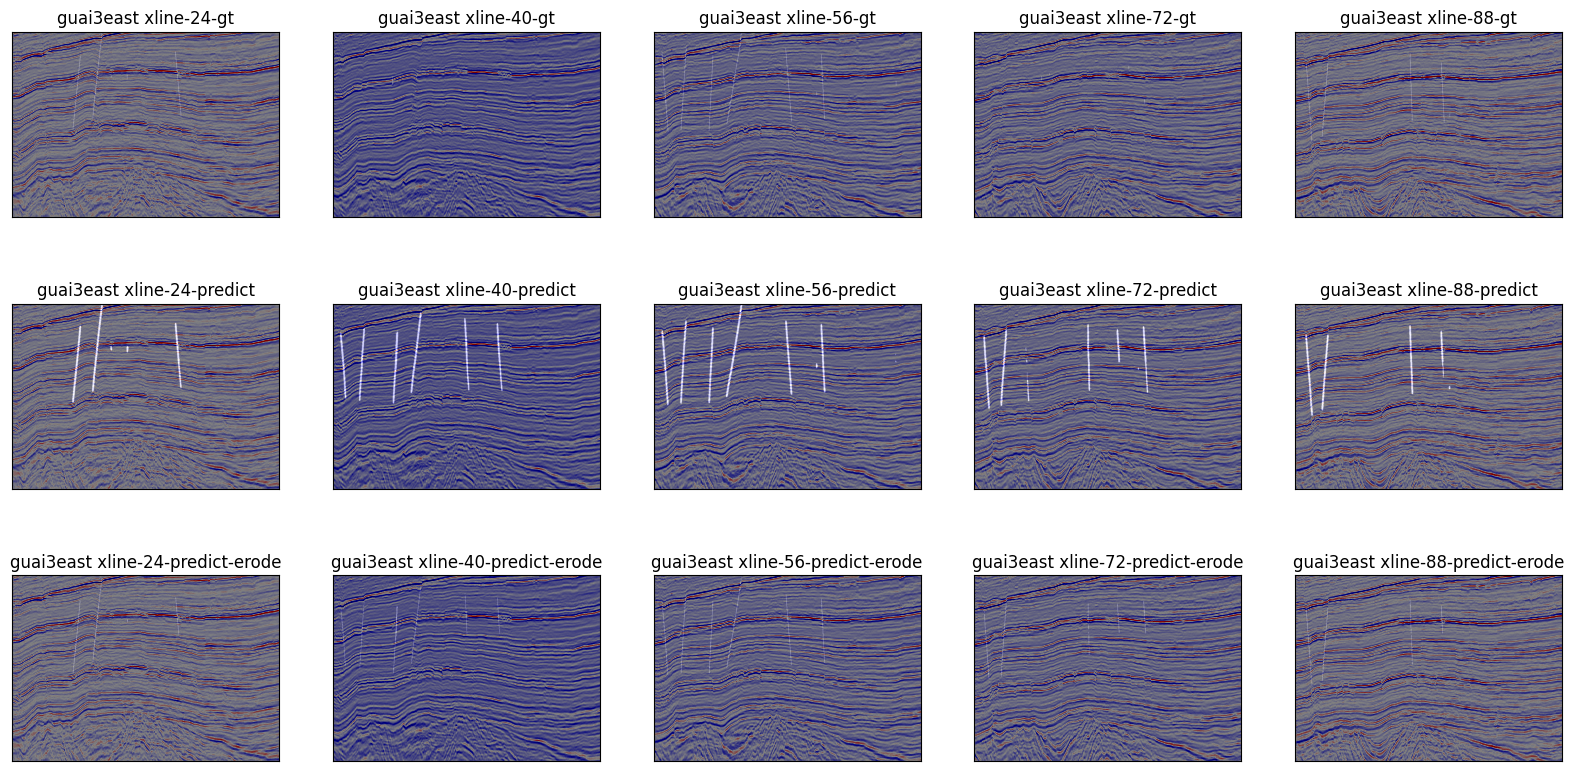

In [13]:
th = 0.5
idxs = [24, 40, 56, 72, 88]
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax=plt.subplots(3,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[:, idx, :].T, cmap='seismic')
    ax[0, col].imshow(gt[:, idx, :].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'guai3east xline-{idx}-gt')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    ax[1, col].imshow(seis[:, idx, :].T, cmap='seismic')
    pred_slice = (pred_xline[:, idx, :] > th).astype(np.uint8).T
    ax[1, col].imshow(pred_slice, cmap='gray', alpha=0.5)
    ax[1, col].axes.set_title(f'guai3east xline-{idx}-predict')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    ax[2, col].imshow(seis[:, idx, :].T, cmap='seismic')
    ax[2, col].imshow(cv2.erode(pred_slice, kernel, iterations=3), cmap='gray', alpha=0.5)
    ax[2, col].axes.set_title(f'guai3east xline-{idx}-predict-erode')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
plt.show()

# madonglianpian

In [14]:
seis = segyio.tools.cube("/home/zhangzr/FaultRecongnition/Fault_data/project_data_v3/madonglianpian/seis.sgy")
gt = segyio.tools.cube("/home/zhangzr/FaultRecongnition/Fault_data/project_data_v3/madonglianpian/madonglianpian_fault.sgy")
pred_inline = np.load("/home/zhangzr/FaultRecongnition/mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_mix_data_v3_force_3_chan-512x512_per_image_normal_simmim_2000e/madonglianpian_pred/score_inline.npy", mmap_mode="r")
pred_xline =  np.load("/home/zhangzr/FaultRecongnition/mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_mix_data_v3_force_3_chan-512x512_per_image_normal_simmim_2000e/madonglianpian_pred/score_xline.npy", mmap_mode="r")

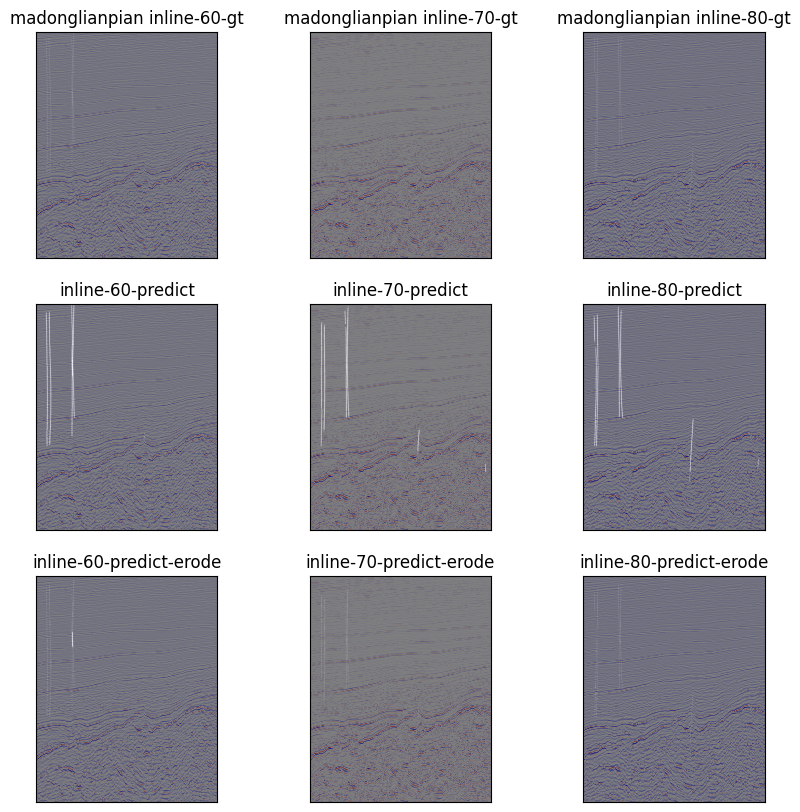

In [23]:
th = 0.5
idxs = [60, 70, 80]
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax=plt.subplots(3,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[0, col].imshow(gt[idx, :, :].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'madonglianpian inline-{idx}-gt')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    ax[1, col].imshow(seis[idx, :, :].T, cmap='seismic')
    pred_slice = (pred_inline[idx, :, :] > th).astype(np.uint8).T
    ax[1, col].imshow(pred_slice, cmap='gray', alpha=0.5)
    ax[1, col].axes.set_title(f'inline-{idx}-predict')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    ax[2, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[2, col].imshow(cv2.erode(pred_slice, kernel, iterations=3), cmap='gray', alpha=0.5)
    ax[2, col].axes.set_title(f'inline-{idx}-predict-erode')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
plt.show()

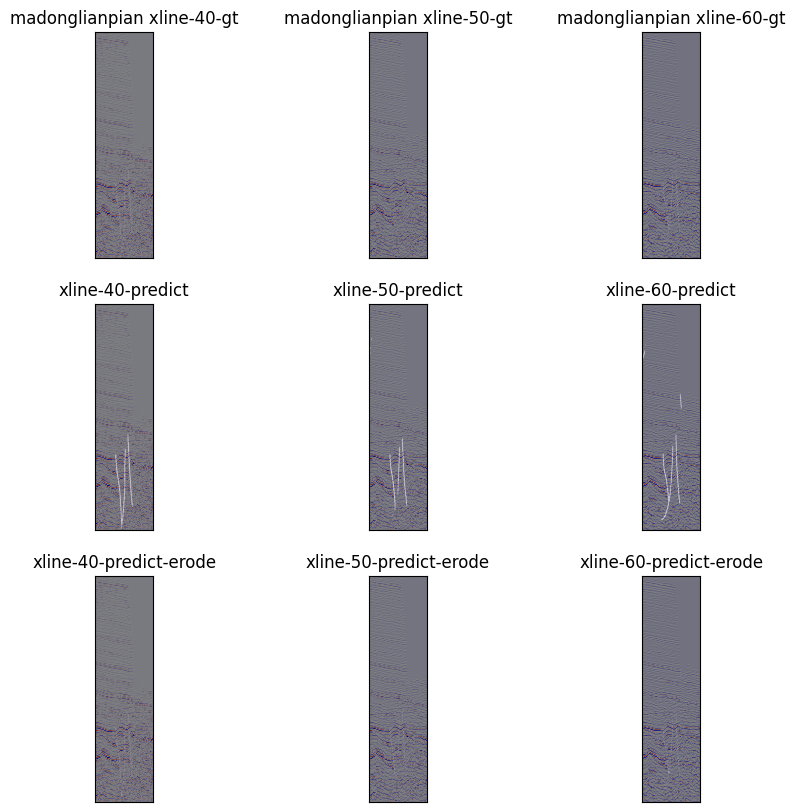

In [28]:
th = 0.5
idxs = [40, 50, 60]
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax=plt.subplots(3,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[:, idx, :].T, cmap='seismic')
    ax[0, col].imshow(gt[:, idx, :].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'madonglianpian xline-{idx}-gt')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    ax[1, col].imshow(seis[:, idx, :].T, cmap='seismic')
    pred_slice = (pred_xline[:, idx, :] > th).astype(np.uint8).T
    ax[1, col].imshow(pred_slice, cmap='gray', alpha=0.5)
    ax[1, col].axes.set_title(f'xline-{idx}-predict')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    ax[2, col].imshow(seis[:, idx, :].T, cmap='seismic')
    ax[2, col].imshow(cv2.erode(pred_slice, kernel, iterations=3), cmap='gray', alpha=0.5)
    ax[2, col].axes.set_title(f'xline-{idx}-predict-erode')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
plt.show()